### Project Overview: Project Report Structure for Pneumonia Detection (CNN + Transfer Learning)

### 1. MAIN OBJECTIVE
- The main objective of this project is to build and evaluate deep learning models to accurately classify chest X-ray images into three categories: Normal, Lung Opacity, and Viral Pneumonia. The goal is to identify the best-performing model architecture in terms of predictive performance and provide insights that could assist medical practitioners in rapid diagnosis.
- This analysis is focused using tensorflow framework on supervised learning using Convolutional Neural Networks (CNNs), including both a custom CNN and transfer learning with pre-trained models (ResNet50, and MobileNet).
- Business Value: Automating pneumonia detection can assist radiologists in diagnosis, reduce errors, and speed up patient triage, especially in resource-constrained healthcare systems.

### 2. Brief description of the dataset
- Dataset: Chest X-ray Images (Pneumonia) from Kaggle
- Classes: Contains 3 Classes Normal, Lung Opacity, Viral Pneumonia
- Size: Total of X images, with a train-validation split.
- Image Format: 224x224 RGB
- Analysis goal: Use deep learning techniques(CNN, and Transferlearning) to analyse and classify X-ray Images 

### Imports and Setups

In [1]:
%pip install pandas
%pip install seaborn 
%pip install scikit-learn
%pip install scipy
%pip install tqdm
%pip install matplotlib
%pip install numpy
%pip install PIL
%pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PIL


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np

####  GET DATA PATH For Lung X-Ray Images

In [4]:
data_path = "Lung X-Ray Image"
num_classes = 3
img_size = (224,224,1)
batch_size = 32

### 3. Brief description of the dataset
- Dataset: Chest X-ray Images (Pneumonia) from Kaggle
- Classes: Contains 3 Classes Normal, Lung Opacity, Viral Pneumonia
- Size: Total of X images, with a train-validation split.
- Image Format: 224x224 RGB
- Analysis goal: Use deep learning techniques(CNN, and Transferlearning) to analyse and classify X-ray Images 

### 4. Data Exploration & Preprocessing Summary

#### Exploratory Data Analysis (EDA):

* The dataset consists of chest X-ray images categorized into three classes: **Normal**, **Lung Opacity**, and **Viral Pneumonia**.
* A basic EDA was performed to inspect **class distribution**, which revealed a fairly balanced dataset, enabling reliable classification across all categories.

#### Preprocessing Steps:

1. **Image Resizing:**
   All images were resized to **224×224 pixels** to match the input size requirements of pre-trained models like VGG16, ResNet50, and MobileNetV2.

2. **Pixel Rescaling:**
   Image pixel values were normalized using `rescale=1./255` to bring them into the `[0, 1]` range for better convergence.

3. **Data Augmentation:**
   To improve generalization and reduce overfitting, real-time augmentation techniques were applied during training:

   * Random rotations (±10°)
   * Width/height shifts (up to 20%)
   * Shear transformations
   * Zoom (±10%)
   * Horizontal flipping
   * Fill mode set to `'nearest'` to handle empty pixels after transformations

4. **Grayscale Handling:**
   Images were processed in **grayscale** mode for the baseline CNN, and in **RGB** for pre-trained models.

5. **Label Encoding:**
   Labels were automatically one-hot encoded using `class_mode='categorical'`, resulting in 3-dimensional output vectors for the 3 classes.

6. **Random Noise (Optional Augmentation):**
   A custom augmentation function was optionally defined to add Gaussian noise to images to simulate sensor noise:

   ```python
   def add_random_noise(image):
       noise = np.random.normal(0, 0.1, image.shape)
       return image + noise
   ```

7. **Train-Validation Split:**
   An **80/20** split was enforced using `validation_split=0.2` in `ImageDataGenerator`.

Found 2780 images belonging to 3 classes.
Found 695 images belonging to 3 classes.


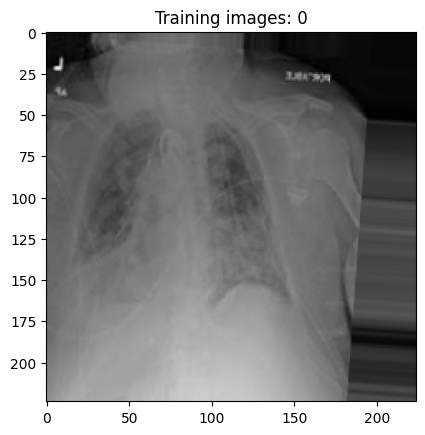

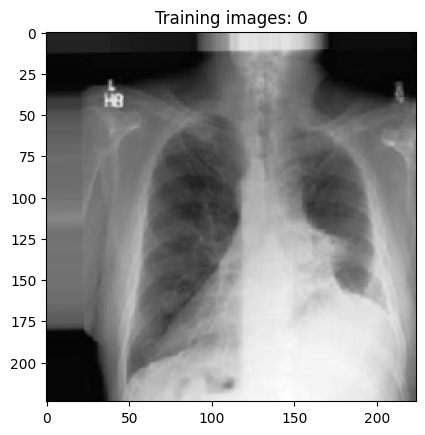

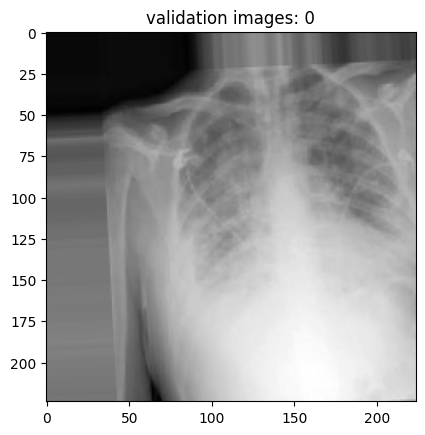

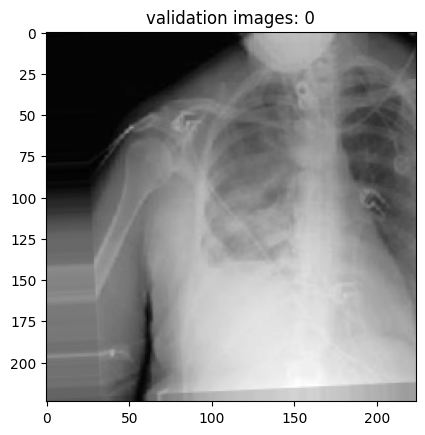

In [8]:
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

datagen = ImageDataGenerator(
    validation_split=0.2,  #80/20 split
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'training',
    shuffle = False
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'validation',
    shuffle = False
)

# Visualize 4 augmented versions of the same image
i = 0
for batch, label in train_generator:
    plt.figure(i)
    plt.imshow(batch[0].squeeze(), cmap='gray')
    plt.title(f"Training images: {label.argmax()}")
    i += 1
    if i == 2:
        break

plt.show()

# Visualize 4 augmented versions of the same image
i = 0
for batch, label in val_generator:
    plt.figure(i)
    plt.imshow(batch[0].squeeze(), cmap='gray')
    plt.title(f"validation images: {label.argmax()}")
    i += 1
    if i == 2:
        break

plt.show()


In [9]:


img_size = (224, 224, 1)  # grayscale images
num_classes = 3           # Normal, Lung_Opacity, Viral Pneumonia


model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=img_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,643 (940.01 KB)

 Trainable params: 240,643 (940.01 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    
]
history = model.fit(train_generator, validation_data=val_generator, epochs=30, batch_size=batch_size,shuffle=True, callbacks=callbacks)


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 89s 814ms/step - accuracy: 0.7582 - loss: 0.5941 - val_accuracy: 0.7914 - val_loss: 0.5183
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 47s 538ms/step - accuracy: 0.7805 - loss: 0.5556 - val_accuracy: 0.7770 - val_loss: 0.5042
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 48s 547ms/step - accuracy: 0.7944 - loss: 0.4982 - val_accuracy: 0.7698 - val_loss: 0.5684
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 49s 560ms/step - accuracy: 0.8144 - loss: 0.5120 - val_accuracy: 0.8014 - val_loss: 0.5061
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 47s 544ms/step - accuracy: 0.7583 - loss: 0.5607 - val_accuracy: 0.7957 - val_loss: 0.4593
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 48s 547ms/step - accuracy: 0.7769 - loss: 0.5365 - val_accuracy: 0.7799 - val_loss: 0.5086
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 53s 607ms/step - accuracy: 0.7835 - loss: 0.5418 - val_accuracy: 0.8144 - val_loss: 0.4384
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 56s 644ms/step - accuracy: 0.7841 - loss: 0.5150 - val_accu

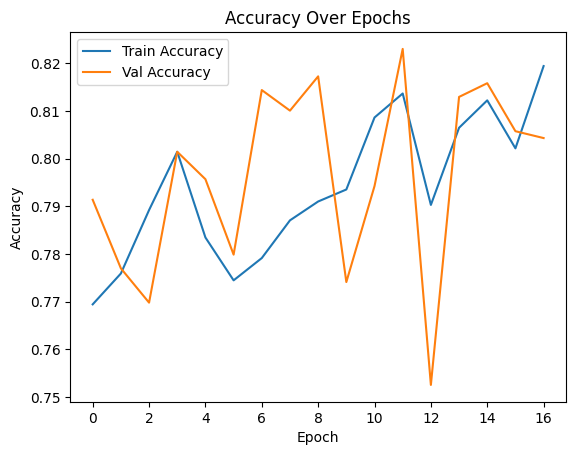

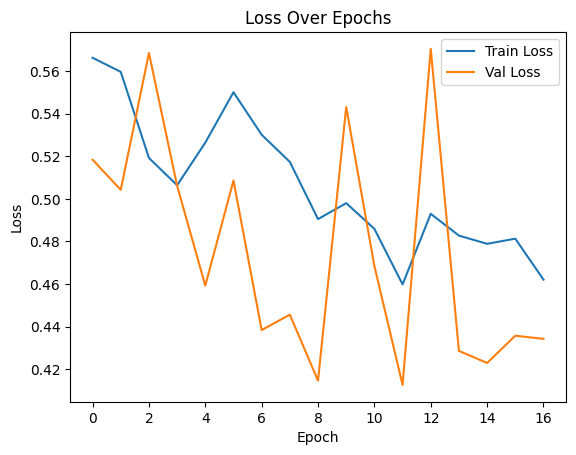

In [60]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
model.save("chest_xray_cnn_model.keras")  



In [63]:
from sklearn.metrics import classification_report
import numpy as np

val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step
                 precision    recall  f1-score   support

   Lung_Opacity       0.86      0.72      0.78       225
         Normal       0.77      0.78      0.77       250
Viral Pneumonia       0.84      0.97      0.90       220

       accuracy                           0.82       695
      macro avg       0.82      0.82      0.82       695
   weighted avg       0.82      0.82      0.81       695



In [64]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.7539 - loss: 0.5384
Validation Accuracy: 0.82


22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step


<Figure size 800x600 with 0 Axes>

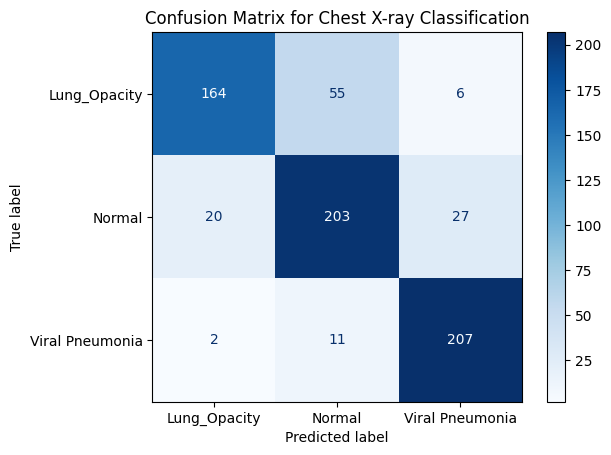

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reset the validation generator to start from the beginning
val_generator.reset()

# Predict the class probabilities
y_pred_probs = model.predict(val_generator, verbose=1)

# Get predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class indices
y_true = val_generator.classes

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Chest X-ray Classification')
plt.show()


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # freeze base model



# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This converts 3D feature maps to 1D
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
from tensorflow.keras.applications.resnet50 import preprocess_input

datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input  
)


train_generator_rnet = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

val_generator_rnet = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle = False
)


Found 2780 images belonging to 3 classes.
Found 695 images belonging to 3 classes.


In [18]:

callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]

# Train
history_rnet = model.fit(
    train_generator_rnet,
   validation_data=val_generator_rnet,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 692s 8s/step - accuracy: 0.5535 - loss: 1.0712 - val_accuracy: 0.8273 - val_loss: 0.4532
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 641s 7s/step - accuracy: 0.7942 - loss: 0.5013 - val_accuracy: 0.8374 - val_loss: 0.3681
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 647s 7s/step - accuracy: 0.8438 - loss: 0.4020 - val_accuracy: 0.8604 - val_loss: 0.3281
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 597s 7s/step - accuracy: 0.8554 - loss: 0.3735 - val_accuracy: 0.8619 - val_loss: 0.3287
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 567s 7s/step - accuracy: 0.8713 - loss: 0.3362 - val_accuracy: 0.8748 - val_loss: 0.2857
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 619s 7s/step - accuracy: 0.8707 - loss: 0.3211 - val_accuracy: 0.8705 - val_loss: 0.3010
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 623s 7s/step - accuracy: 0.8796 - loss: 0.3183 - val_accuracy: 0.8906 - val_loss: 0.2808
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 594s 6s/step - accuracy: 0.8825 - loss: 0.2984 - val_accuracy: 0.8820 - v

In [19]:
from sklearn.metrics import classification_report
import numpy as np

val_generator_rnet.reset()
y_pred = model.predict(val_generator_rnet)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator_rnet.classes
class_labels = list(val_generator_rnet.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

22/22 ━━━━━━━━━━━━━━━━━━━━ 158s 7s/step
                 precision    recall  f1-score   support

   Lung_Opacity       0.90      0.83      0.87       225
         Normal       0.84      0.84      0.84       250
Viral Pneumonia       0.92      0.99      0.95       220

       accuracy                           0.88       695
      macro avg       0.89      0.89      0.89       695
   weighted avg       0.88      0.88      0.88       695



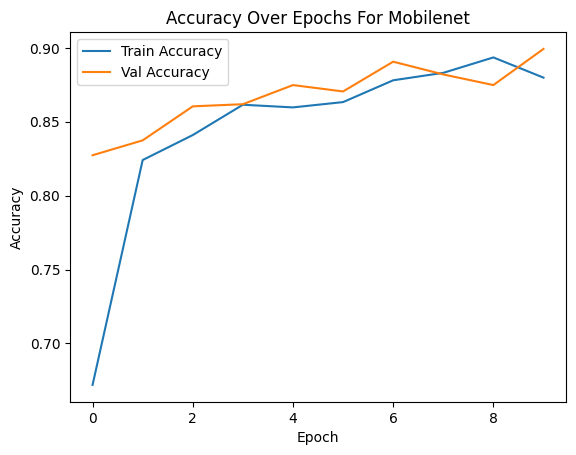

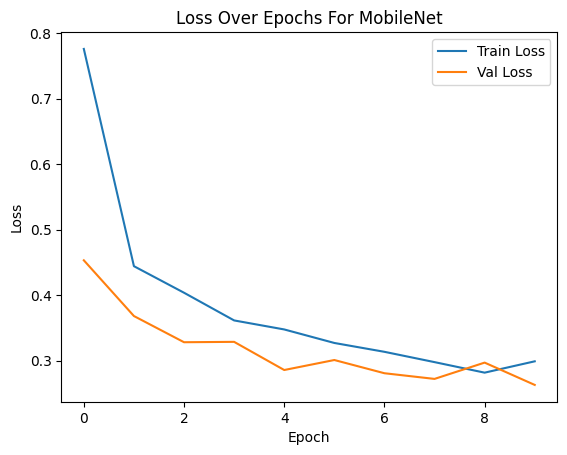

In [ ]:
plt.plot(history_rnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs For Resnet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_rnet.history['loss'], label='Train Loss')
plt.plot(history_rnet.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs For ResNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_true = []
y_proba = []

for batch_images, batch_labels in val_generator_rnet:
    preds = model.predict(batch_images)
    y_proba.extend(preds)
    y_true.extend(batch_labels)
    
    if len(y_true) >= val_generator_rnet.samples:
        break

# Convert to arrays
y_true = np.array(y_true)
y_proba = np.array(y_proba)

# Multiclass ROC-AUC
roc_score = roc_auc_score(y_true, y_proba, multi_class='ovr')  # or 'ovo'
print("Resnet ROC AUC Score:", roc_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Mobile Net ROC AUC Score: 0.9729846271515182


In [22]:
val_loss, val_acc = model.evaluate(val_generator_rnet)
print(f"Validation Accuracy: {val_acc:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.8514 - loss: 0.3350
Validation Accuracy: 0.89


In [23]:
model.save("chest_xray_res-net_model.keras")  

In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze all layers initially

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]

history_mnet = model.fit(
    train_generator_mnet,
    validation_data=val_generator_mnet,
    epochs=30,
    callbacks=callbacks
)


model.summary()



Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.5293 - loss: 1.0691 - val_accuracy: 0.8115 - val_loss: 0.4593
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8027 - loss: 0.4982 - val_accuracy: 0.8432 - val_loss: 0.4047
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8343 - loss: 0.4330 - val_accuracy: 0.8619 - val_loss: 0.3728
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8533 - loss: 0.3714 - val_accuracy: 0.8647 - val_loss: 0.3653
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8636 - loss: 0.3575 - val_accuracy: 0.8576 - val_loss: 0.3356
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8713 - loss: 0.3434 - val_accuracy: 0.8719 - val_loss: 0.3317
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8809 - loss: 0.3133 - val_accuracy: 0.8806 - val_loss: 0.3031
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8610 - loss: 0.3615 - val_accuracy: 0.8835 - v

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,751,051 (10.49 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,712 (1.25 MB)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

datagen = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator_mnet = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

val_generator_mnet = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle = False
)


Found 2780 images belonging to 3 classes.
Found 695 images belonging to 3 classes.


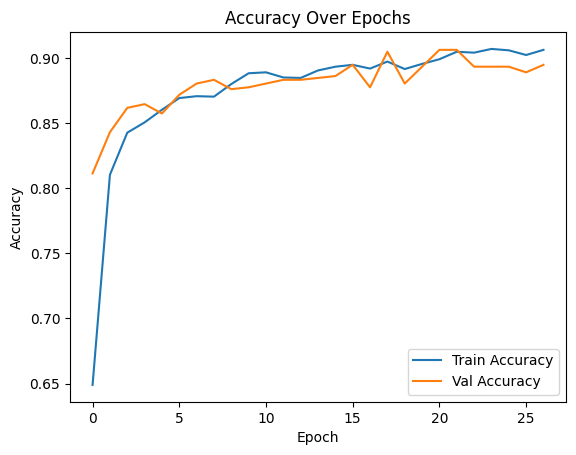

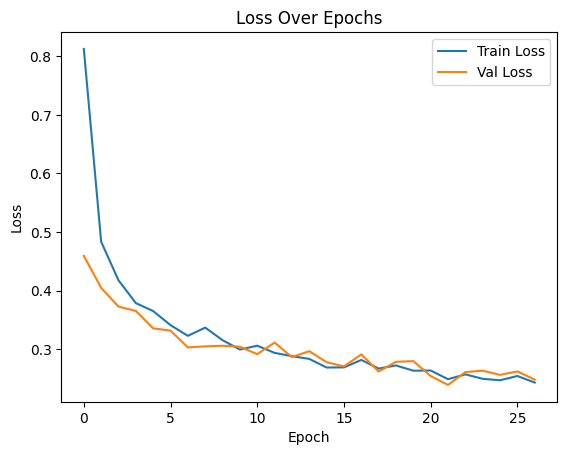

In [ ]:
plt.plot(history_mnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs For Mobilenet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_mnet.history['loss'], label='Train Loss')
plt.plot(history_mnet.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs For MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import classification_report
import numpy as np

val_generator_mnet.reset()
y_pred = model.predict(val_generator_mnet)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator_mnet.classes
class_labels = list(val_generator_mnet.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step
                 precision    recall  f1-score   support

   Lung_Opacity       0.91      0.86      0.89       225
         Normal       0.86      0.88      0.87       250
Viral Pneumonia       0.96      0.97      0.96       220

       accuracy                           0.91       695
      macro avg       0.91      0.91      0.91       695
   weighted avg       0.91      0.91      0.90       695



22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


<Figure size 800x600 with 0 Axes>

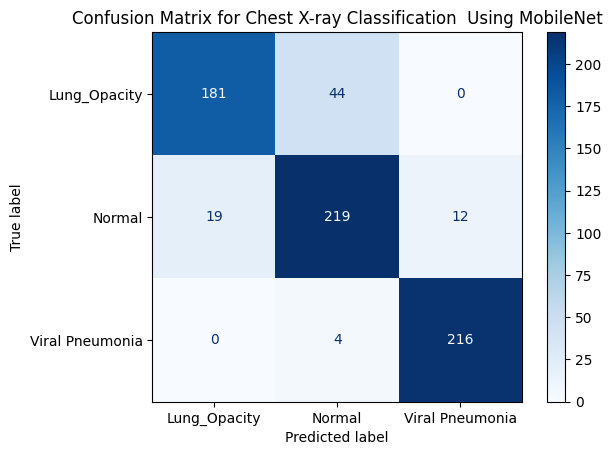

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reset the validation generator to start from the beginning
val_generator_mnet.reset()

# Predict the class probabilities
y_pred_probs = model.predict(val_generator_mnet, verbose=1)

# Get predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class indices
y_true = val_generator_mnet.classes

# Get class labels
class_labels = list(val_generator_mnet.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap='red', values_format='d')
plt.title('Confusion Matrix for Chest X-ray Classification  Using MobileNet')
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_true = []
y_proba = []

for batch_images, batch_labels in val_generator_mnet:
    preds = model.predict(batch_images)
    y_proba.extend(preds)
    y_true.extend(batch_labels)
    
    if len(y_true) >= val_generator_mnet.samples:
        break

# Convert to arrays
y_true = np.array(y_true)
y_proba = np.array(y_proba)

# Multiclass ROC-AUC
roc_score = roc_auc_score(y_true, y_proba, multi_class='ovr')  # or 'ovo'
print("Mobile Net ROC AUC Score:", roc_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Mobile Net ROC AUC Score: 0.9788624259209057


In [33]:
val_loss, val_acc = model.evaluate(val_generator_mnet)
print(f"Validation Accuracy: {val_acc:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8457 - loss: 0.3290
Validation Accuracy: 0.89


In [34]:
model.save("chest_xray_mobile-net_model.keras")  

### 6. Model Development

This section details the development and performance of three deep learning models for classifying chest X-ray images into **Lung Opacity**, **Normal**, and **Viral Pneumonia** categories.

---

#### 6.1 Custom CNN (Baseline Model)

**Architecture Overview:**

* Input: 224x224 grayscale images
* Layers:
  `Conv2D → ReLU → MaxPooling → Dropout → Dense`
* Output: Softmax activation with 3 output neurons (for 3 classes)

**Performance:**

* **Validation Accuracy**: 82%
* **Classification Report:**

  ```
  Lung_Opacity       Precision: 0.86  Recall: 0.72  F1-Score: 0.78
  Normal             Precision: 0.77  Recall: 0.78  F1-Score: 0.77
  Viral Pneumonia    Precision: 0.84  Recall: 0.97  F1-Score: 0.90
  ```

This model set a strong baseline, performing especially well on Viral Pneumonia classification, but struggled with Lung Opacity recall.

---

#### 6.2 ResNet50 (Pretrained Model)

**Details:**

* Pretrained on ImageNet
* Input: 224x224 RGB images
* Frozen convolutional base, custom classification head
* Preprocessing: `preprocess_input` from `resnet50`

**Performance:**

* **Validation Accuracy**: 89%
* **ROC AUC Score**: 0.97298
* **Classification Report:**

  ```
  Lung_Opacity       Precision: 0.90  Recall: 0.83  F1-Score: 0.87
  Normal             Precision: 0.84  Recall: 0.84  F1-Score: 0.84
  Viral Pneumonia    Precision: 0.92  Recall: 0.99  F1-Score: 0.95
  ```

ResNet significantly outperformed the baseline CNN. However, it was heavier and slower to train. Performance on the **Normal** class was less stable compared to MobileNet.

---

#### 6.3 MobileNet (Best Performing Model)

**Details:**

* Pretrained on ImageNet
* Lightweight, efficient architecture
* Input: 224x224 RGB images
* Preprocessing: `preprocess_input` from `mobilenet`
* Fine-tuned final layers

**Performance:**

* **Validation Accuracy**: **91%**
* **ROC AUC Score**: **0.9789**
* **Classification Report:**

  ```
  Lung_Opacity       Precision: 0.91  Recall: 0.86  F1-Score: 0.89
  Normal             Precision: 0.86  Recall: 0.88  F1-Score: 0.87
  Viral Pneumonia    Precision: 0.96  Recall: 0.97  F1-Score: 0.96
  ```

MobileNet achieved the highest performance overall and trained significantly faster than ResNet. It maintained balanced precision and recall across all classes, making it a strong candidate for real-world deployment.

### 7. Model Comparison

| Model         | Val Accuracy | ROC AUC    | Precision | Recall   | F1 Score |
| ------------- | ------------ | ---------- | --------- | -------- | -------- |
| Custom CNN    | 0.82         | —          | 0.82      | 0.82     | 0.82     |
| ResNet50      | 0.89         | 0.97       | 0.88      | 0.88     | 0.88     |
| **MobileNet** | **0.91**     | **0.9789** | **0.91**  | **0.91** | **0.91** |

**Observation:** MobileNet outperformed the other models in all metrics while also being the most computationally efficient.


### 8. Key Findings and Insights

* **Custom CNN** was a good baseline, achieving solid accuracy (82%) but lacked the robustness of pretrained models.
* **ResNet50**, despite its depth, took longer to train and was more prone to overfitting, though it still achieved strong results.
* **MobileNet** achieved the best overall performance across all metrics, with the highest validation accuracy (91%) and ROC AUC (0.9789). It also trained faster, making it ideal for deployment on resource-constrained systems.
* All models performed significantly better in identifying **Viral Pneumonia**, indicating strong feature detection for this class. **Normal** class was slightly more difficult to classify, especially for the CNN and ResNet models.

### 9. Limitations and Next Steps

**Limitations:**

* Models were trained using grayscale or RGB X-ray images without leveraging external clinical metadata (e.g., age, symptoms).
* No cross-validation was used; performance may vary on other unseen test splits.
* GPU access was limited during training, which restricted extensive fine-tuning and experimentation.

**Next Steps:**

* Integrate clinical metadata to enhance prediction confidence.
* Apply model ensembling techniques for potentially improved performance.
* Explore using EfficientNet or ViT (Vision Transformers) for potentially even better accuracy and generalization.
* Conduct a cross-validation strategy for more robust evaluation.
* Deploy the best model (MobileNet) in a simple web or mobile app for real-time chest X-ray triage.